# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# Installed citipy in console with "pip install citipy"
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [23]:
# Creating the query url using API call documented here: https://openweathermap.org/current
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Initializing lists for results from query
lat = []
lng = []
found_cities = []
temp = []
humidity = []
cloudiness = []
windspeed = []
date = []
country = []
city_id = []

for i in range(0,len(cities)):
    try:
        response = requests.get(query_url + cities[i]).json()
        
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        found_cities.append(response['name'])
        city_id.append(response['id'])
        print(f'Found: {cities[i]}')
    except:  
        print(f'NOT Found: {cities[i]}')
        


Found: port alfred
Found: piacabucu
Found: puerto ayora
Found: punta arenas
Found: port elizabeth
Found: toguchin
Found: atuona
Found: hermanus
Found: vanderhoof
Found: ilulissat
Found: nome
NOT Found: taolanaro
Found: bredasdorp
Found: norman wells
Found: meulaboh
Found: lagoa
Found: hobart
Found: albany
Found: busselton
Found: ust-nera
Found: bluff
NOT Found: barentsburg
Found: burnie
Found: qarqin
Found: fuling
Found: rikitea
Found: lebu
NOT Found: tubruq
Found: cherskiy
Found: dafeng
Found: presque isle
NOT Found: vaitupu
Found: vagay
Found: bintulu
Found: barinas
Found: qaanaaq
NOT Found: grand river south east
Found: grande prairie
Found: butaritari
Found: paamiut
Found: kodiak
Found: chuy
Found: auki
Found: inhambane
Found: thompson
Found: cape town
Found: hailar
Found: medea
Found: lakes entrance
Found: korla
Found: ushuaia
Found: mataura
Found: hassleholm
NOT Found: samusu
Found: fairbanks
Found: chokurdakh
Found: khatanga
Found: virginia beach
Found: abu samrah
Found: east lo

Found: salalah
Found: zhigansk
Found: shangqiu
Found: katsuura
Found: taua
Found: hovd
Found: sao filipe
Found: bloemhof
Found: tagusao
Found: pangnirtung
Found: coron
NOT Found: katsiveli
Found: pingxiang
Found: simbahan
Found: savelugu
Found: artyom
Found: padang
Found: berbera
Found: ballina
Found: cuamba
Found: shumikha
Found: preobrazheniye
Found: belaya gora
Found: pitimbu
Found: cross lanes
Found: xam nua
Found: uarini
Found: alice springs
Found: makakilo city
Found: henties bay
Found: kodra
Found: atambua
Found: ilo
Found: hami
Found: port blair
Found: atarra
Found: port-cartier
Found: kumluca
Found: masallatah
Found: asheboro
Found: erenhot
Found: sitka
NOT Found: saleaula
Found: cotonou
Found: port-de-bouc
Found: kichera
Found: mporokoso
Found: araouane
Found: tabora
NOT Found: sedelnikovo
Found: touros
Found: juneau
Found: svetlyy
Found: ust-tsilma
Found: pacifica
Found: emba
Found: la seyne-sur-mer
Found: channel-port aux basques
Found: mirnyy
Found: tucupita
Found: wenling

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
weather_df = pd.DataFrame({'City': found_cities,
                          'Lat': lat,
                          'Lng': lng,
                          'Max Temp': temp,
                          'Humidity': humidity,
                          'Cloudiness': cloudiness,
                          'Wind Speed': windspeed,
                          'Country': country,
                          'Date': date})
weather_df.to_csv('city_data.csv', index = False, mode = 'w+')
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,73.04,91,90,12.35,ZA,1643860658
1,Piaçabuçu,-10.4056,-36.4344,77.90,78,56,7.09,BR,1643860658
2,Puerto Ayora,-0.7393,-90.3518,74.55,92,1,4.00,EC,1643860658
3,Punta Arenas,-53.1500,-70.9167,44.42,70,75,4.61,CL,1643860659
4,Port Elizabeth,-33.9180,25.5701,70.09,88,40,12.66,ZA,1643860659
...,...,...,...,...,...,...,...,...,...
558,Haukipudas,65.1765,25.3523,-7.55,96,97,2.48,FI,1643860404
559,Balkanabat,39.5108,54.3671,50.23,30,4,8.57,TM,1643860405
560,Seoul,37.5683,126.9778,30.42,37,0,9.22,KR,1643860140
561,Lompoc,34.6391,-120.4579,51.60,48,0,6.91,US,1643860406


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
#  Get the indices of cities that have humidity over 100%.
cities_hum_100 = weather_df.index[weather_df['Humidity'] == 100].tolist()

if len(cities_hum_100) == 0:
    print(f'No cities have humidity over 100%')

cities_hum_100

[5, 53, 137, 143, 160, 184, 217, 373, 420, 500]

In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(cities_hum_100)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,73.04,91,90,12.35,ZA,1643860658
1,Piaçabuçu,-10.4056,-36.4344,77.90,78,56,7.09,BR,1643860658
2,Puerto Ayora,-0.7393,-90.3518,74.55,92,1,4.00,EC,1643860658
3,Punta Arenas,-53.1500,-70.9167,44.42,70,75,4.61,CL,1643860659
4,Port Elizabeth,-33.9180,25.5701,70.09,88,40,12.66,ZA,1643860659
...,...,...,...,...,...,...,...,...,...
558,Haukipudas,65.1765,25.3523,-7.55,96,97,2.48,FI,1643860404
559,Balkanabat,39.5108,54.3671,50.23,30,4,8.57,TM,1643860405
560,Seoul,37.5683,126.9778,30.42,37,0,9.22,KR,1643860140
561,Lompoc,34.6391,-120.4579,51.60,48,0,6.91,US,1643860406


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Max Temperature vs. City Latitude (2/2/2022)')

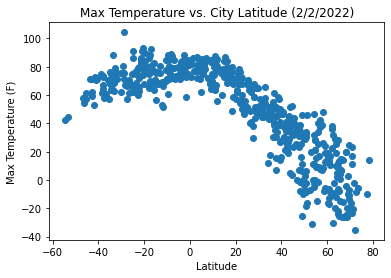

In [27]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temperature vs. City Latitude (2/2/2022)')

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Humidity vs. City Latitude (2/2/2022)')

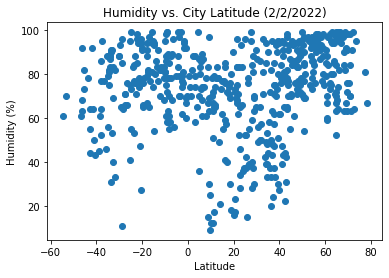

In [28]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. City Latitude (2/2/2022)')

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Cloudiness vs. City Latitude (2/2/2022)')

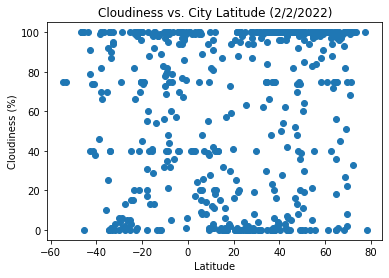

In [29]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. City Latitude (2/2/2022)')

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Wind Speed vs. City Latitude (2/2/2022)')

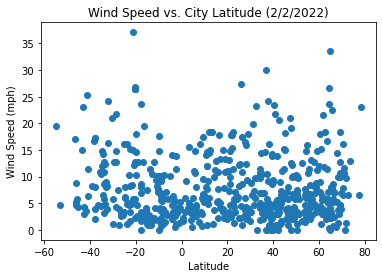

In [30]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed vs. City Latitude (2/2/2022)')

## Linear Regression

In [31]:
# Finding the cities in the Northern Hemisphere
northern_cities_df = clean_city_data[clean_city_data['Lat'] > 0]

# Finding the cities in the Southern Hemisphere
southern_cities_df = clean_city_data[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(6, 10, 'y = -1.38x + 91.12')

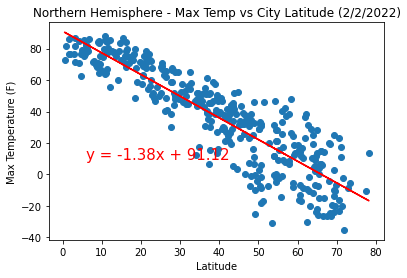

In [32]:
# Determining the linear regression of the plot
x = northern_cities_df['Lat']
y = northern_cities_df['Max Temp']
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(x, y)
regress_values = x*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the scatter data for Max Temp vs. Latitude in the Northern Hemisphere
plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs City Latitude (2/2/2022)')
plt.annotate(line_eq, (6, 10), fontsize = 15, color = 'red')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(-30, 50, 'y = 0.37x + 81.0')

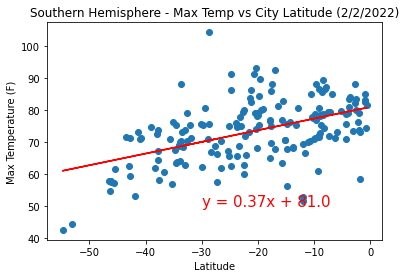

In [33]:
# Determining the linear regression of the plot
x = southern_cities_df['Lat']
y = southern_cities_df['Max Temp']
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(x, y)
regress_values = x*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the scatter data for Max Temp vs. Latitude in the Northern Hemisphere
plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs City Latitude (2/2/2022)')
plt.annotate(line_eq, (-30, 50), fontsize = 15, color = 'red')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(10, 50, 'y = 0.42x + 56.53')

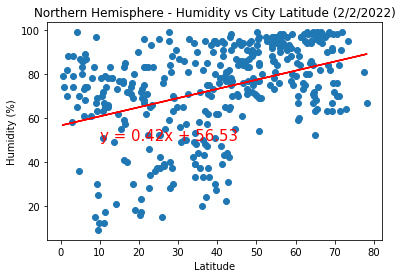

In [34]:
# Determining the linear regression of the plot
x = northern_cities_df['Lat']
y = northern_cities_df['Humidity']
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(x, y)
regress_values = x*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the scatter data for Max Temp vs. Latitude in the Northern Hemisphere
plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs City Latitude (2/2/2022)')
plt.annotate(line_eq, (10, 50), fontsize = 15, color = 'red')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(-40, 60, 'y = 0.3x + 82.79')

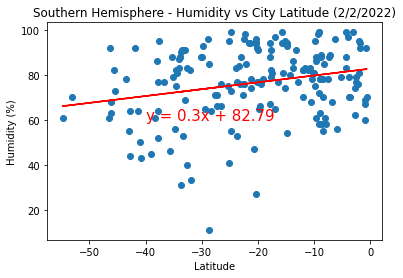

In [35]:
# Determining the linear regression of the plot
x = southern_cities_df['Lat']
y = southern_cities_df['Humidity']
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(x, y)
regress_values = x*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the scatter data for Max Temp vs. Latitude in the Northern Hemisphere
plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs City Latitude (2/2/2022)')
plt.annotate(line_eq, (-40, 60), fontsize = 15, color = 'red')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(40, 50, 'y = 0.68x + 35.14')

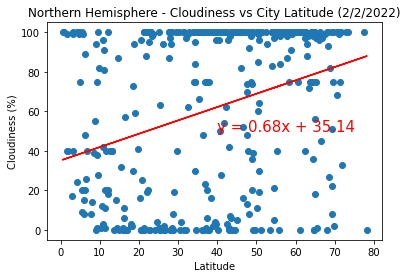

In [36]:
# Determining the linear regression of the plot
x = northern_cities_df['Lat']
y = northern_cities_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(x, y)
regress_values = x*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the scatter data for Max Temp vs. Latitude in the Northern Hemisphere
plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs City Latitude (2/2/2022)')
plt.annotate(line_eq, (40, 50), fontsize = 15, color = 'red')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(-40, 45, 'y = 0.33x + 69.42')

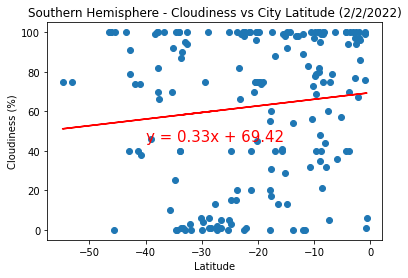

In [43]:
# Determining the linear regression of the plot
x = southern_cities_df['Lat']
y = southern_cities_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(x, y)
regress_values = x*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the scatter data for Max Temp vs. Latitude in the Northern Hemisphere
plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs City Latitude (2/2/2022)')
plt.annotate(line_eq, (-40, 45), fontsize = 15, color = 'red')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(40, 10, 'y = 0.0x + 7.47')

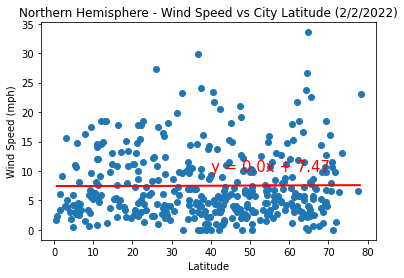

In [44]:
# Determining the linear regression of the plot
x = northern_cities_df['Lat']
y = northern_cities_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(x, y)
regress_values = x*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the scatter data for Max Temp vs. Latitude in the Northern Hemisphere
plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs City Latitude (2/2/2022)')
plt.annotate(line_eq, (40, 10), fontsize = 15, color = 'red')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(-50, 15, 'y = -0.14x + 5.23')

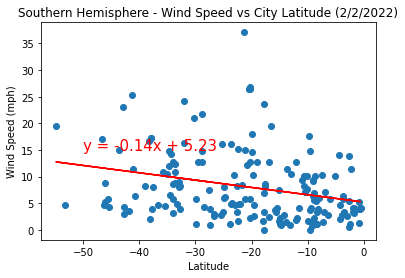

In [45]:
# Determining the linear regression of the plot
x = southern_cities_df['Lat']
y = southern_cities_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(x, y)
regress_values = x*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plotting the scatter data for Max Temp vs. Latitude in the Northern Hemisphere
plt.scatter(x, y)
plt.plot(x, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs City Latitude (2/2/2022)')
plt.annotate(line_eq, (-50, 15), fontsize = 15, color = 'red')